# Consider only the below columns and prepare a prediction model for predicting Price.Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [50]:
# Read the Excel file
df = pd.read_excel(r"C:\Users\Pritee\OneDrive\Documents\aishwarya mam\machine learning\Toyoto_Corrola.xlsx")
df

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [14]:
df.columns


Index(['Id', 'Model', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

In [15]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB
None


In [16]:
# Check for missing values
df.isna().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [19]:
#Outlier detection function
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [20]:
outlier_detection(df,'Age_08_04')

(5.0, 109.0)

In [21]:
df[df['Age_08_04']<5.0]

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
109,111,ÊTOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS MPV,32500,4,1,116,5,4,5,1480
110,112,TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV,31000,4,4000,116,5,4,5,1480
111,113,TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV,31275,4,1500,116,5,4,5,1480
182,184,TOYOTA Corolla 1.4 16V 5DR TERRA 4/5-Doors,21125,2,225,97,5,4,5,1110
183,185,TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors,21500,2,15,110,5,4,5,1130
184,186,ÊTOYOTA Corolla 1.4-16v VVT-i Linea Terra Comf...,17795,1,1,98,4,4,5,1100
185,187,TOYOTA Corolla 1.6-16v VVT-i Linea Terra Comfo...,18245,1,1,110,5,4,5,1075


In [22]:
df.loc[df['Age_08_04']<5.0,'Age_08_04'] = 5.0

In [23]:
outlier_detection(df,'KM')

(-23031.125, 153051.875)

In [24]:
df[df['KM']>153051.875]

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
186,188,TOYOTA Corolla 1.9 D HATCHB SOL 2/3-Doors,6950,43,243000,69,3,4,5,1110
187,189,TOYOTA Corolla 2.0 D4D SEDAN SOL 4/5-Doors,9500,38,180638,90,4,4,5,1160
188,190,TOYOTA Corolla 2.0 D4D LIFTB SOL 4/5-Doors,11950,40,179860,90,5,4,5,1205
189,191,TOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-...,7750,43,178858,110,3,4,5,1084
190,192,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,11950,40,161000,69,3,4,5,1105
191,193,TOYOTA Corolla 1.8D Stationwagen,4350,44,158320,69,5,4,5,1110
378,381,ÊTOYOTA Corolla 1.9 D HATCHB SOL 2/3-Doors,6500,53,216000,69,3,4,5,1110
379,382,TOYOTA Corolla 1.9 D SEDAN TERRA 4/5-Doors,6400,51,198167,69,4,4,5,1095
380,383,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,7000,53,176000,69,3,4,5,1105
381,384,TOYOTA Corolla 2.0 DSL SEDAN LINEA TERRA 4/5-D...,7750,54,174139,72,4,4,5,1100


In [25]:
df.loc[df['KM']>153051.875,'KM'] =153051.875

In [26]:
outlier_detection(df,'HP')

(60.0, 140.0)

In [27]:
df[df['HP']>140.0]

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
8,9,ÊTOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,19700.0,192,3,4,5,1185
10,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,31461.0,192,3,4,6,1185
11,12,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2...,19950,22,43610.0,192,3,4,6,1185
12,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,32189.0,192,3,4,6,1185
13,14,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,21500,31,23000.0,192,3,4,6,1185
14,15,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22500,32,34131.0,192,3,4,6,1185
15,16,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22000,28,18739.0,192,3,4,6,1185
16,17,ÊTOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-...,22750,30,34000.0,192,3,4,5,1185
49,50,TOYOTA Corolla 1.8 16V VVTLI 5DR T SPORT 4/5-D...,21950,31,64982.0,192,5,4,6,1195
53,54,TOYOTA Corolla 1.8 VVTL-i T-Sport 4/5-Doors,21950,27,49866.0,192,5,4,5,1195


In [37]:
# Display summary statistics of numerical columns
df.describe()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.0,1436.000000
mean,721.555014,10730.824513,55.958914,67604.873172,101.10376,4.033426,4.0,5.0,1068.579387
std,416.476890,3626.964585,18.566512,34738.595454,13.14745,0.952677,0.0,0.0,37.774625
min,1.000000,4350.000000,5.000000,1.000000,69.00000,2.000000,4.0,5.0,1000.000000
25%,361.750000,8450.000000,44.000000,43000.000000,90.00000,3.000000,4.0,5.0,1040.000000
50%,721.500000,9900.000000,61.000000,63389.500000,110.00000,4.000000,4.0,5.0,1070.000000
75%,1081.250000,11950.000000,70.000000,87020.750000,110.00000,5.000000,4.0,5.0,1085.000000
max,1442.000000,32500.000000,80.000000,153051.875000,140.00000,5.000000,4.0,5.0,1152.500000


<Axes: >

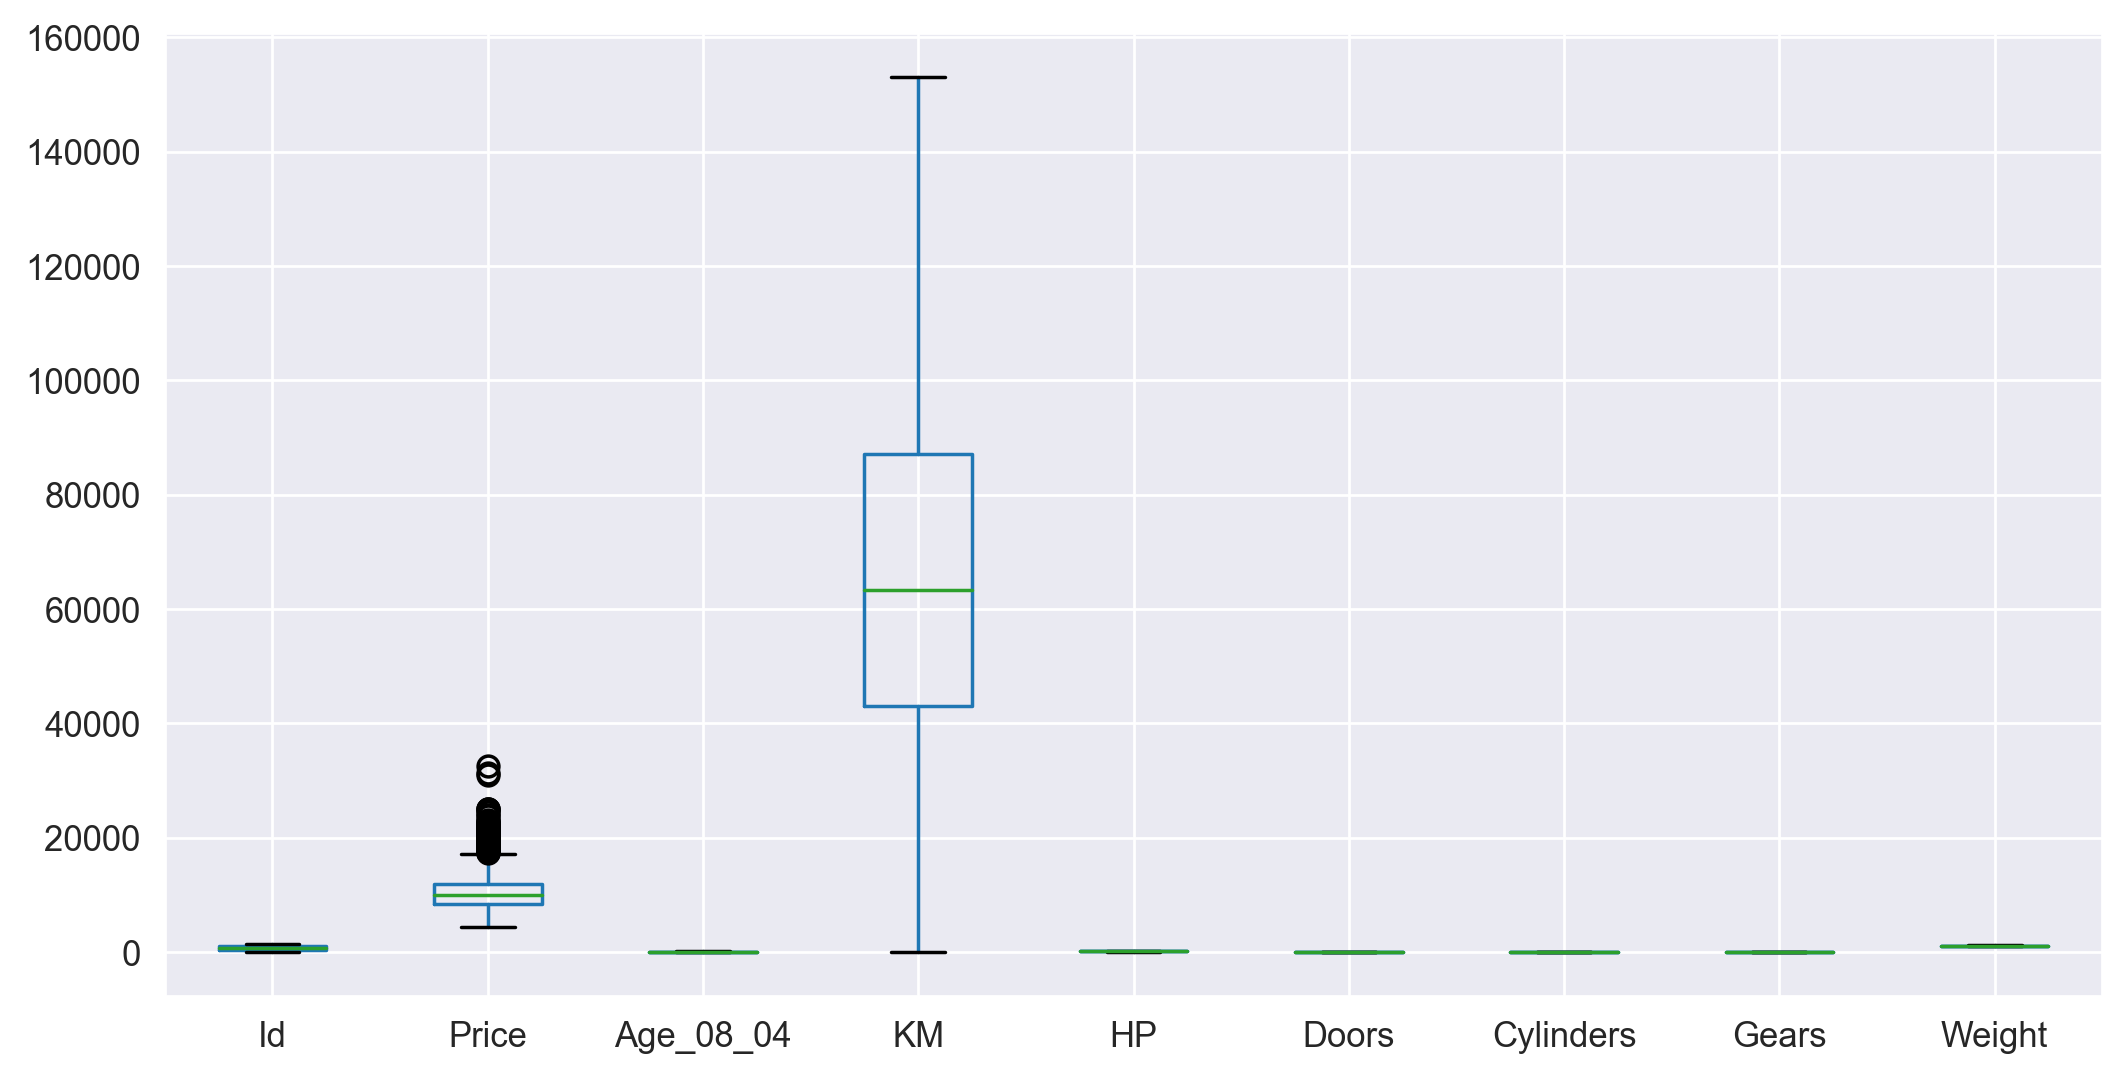

In [38]:
df.boxplot()

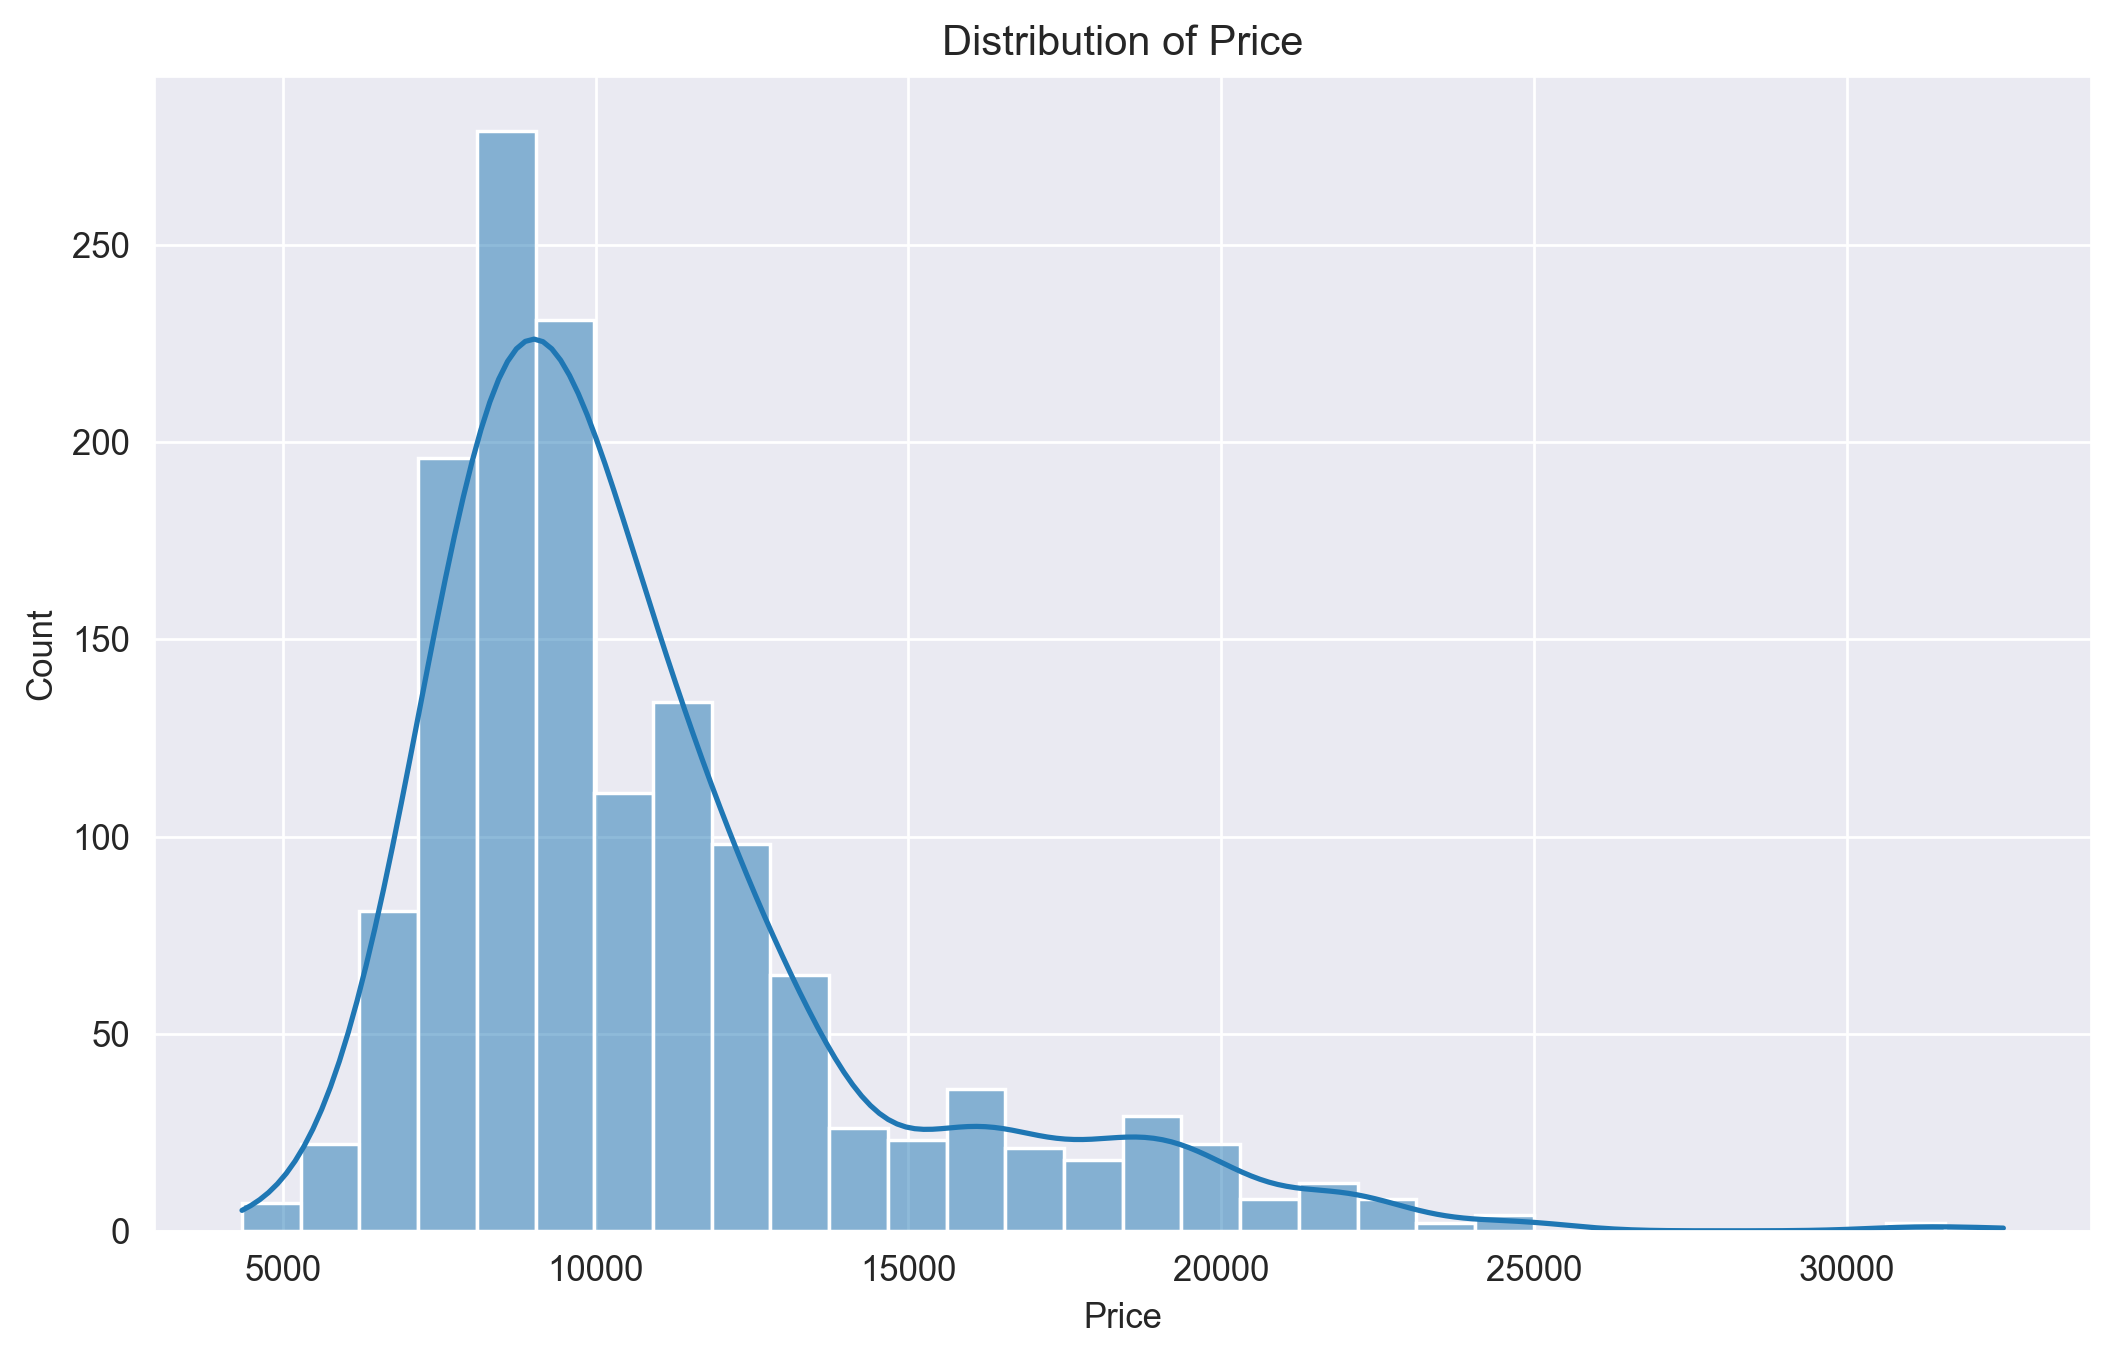

In [39]:
# Visualize the distribution of the target variable 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.show()

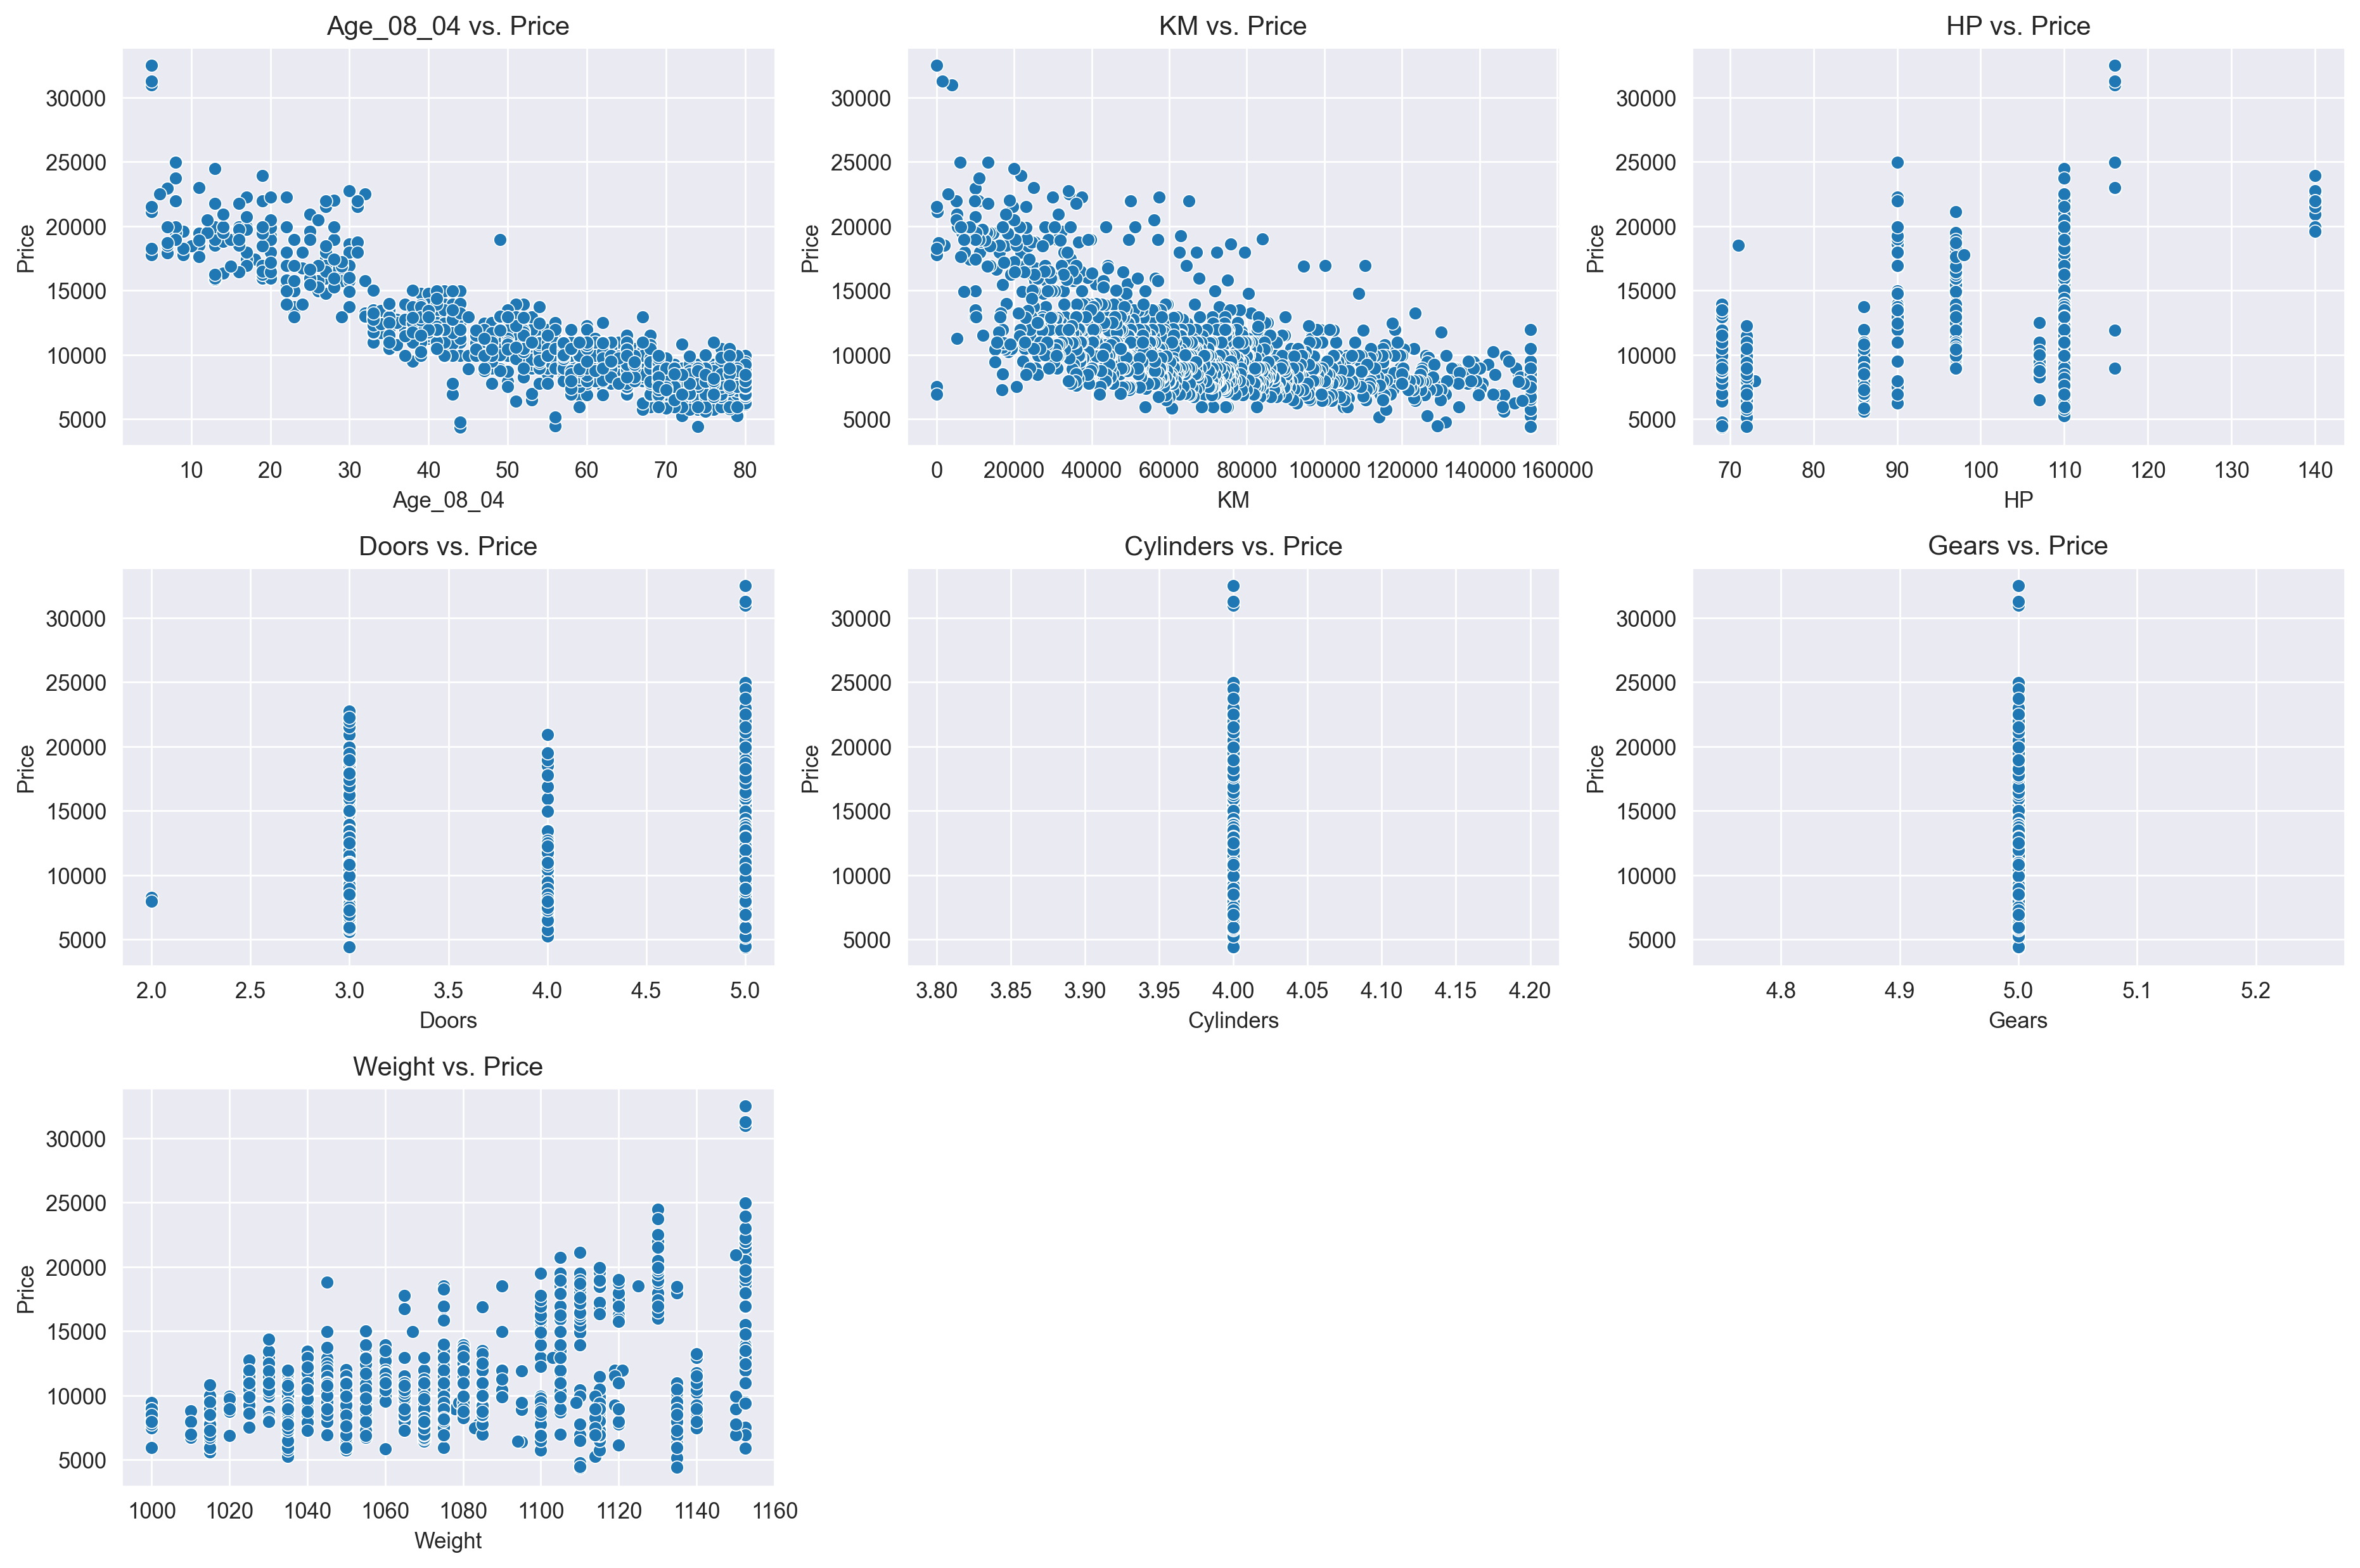

In [40]:
# Visualize relationships between features and the target variable using scatter plots
num_features = ['Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders', 'Gears', 'Weight']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=feature, y='Price', data=df)
    plt.title(f'{feature} vs. Price')

plt.tight_layout()
plt.show()

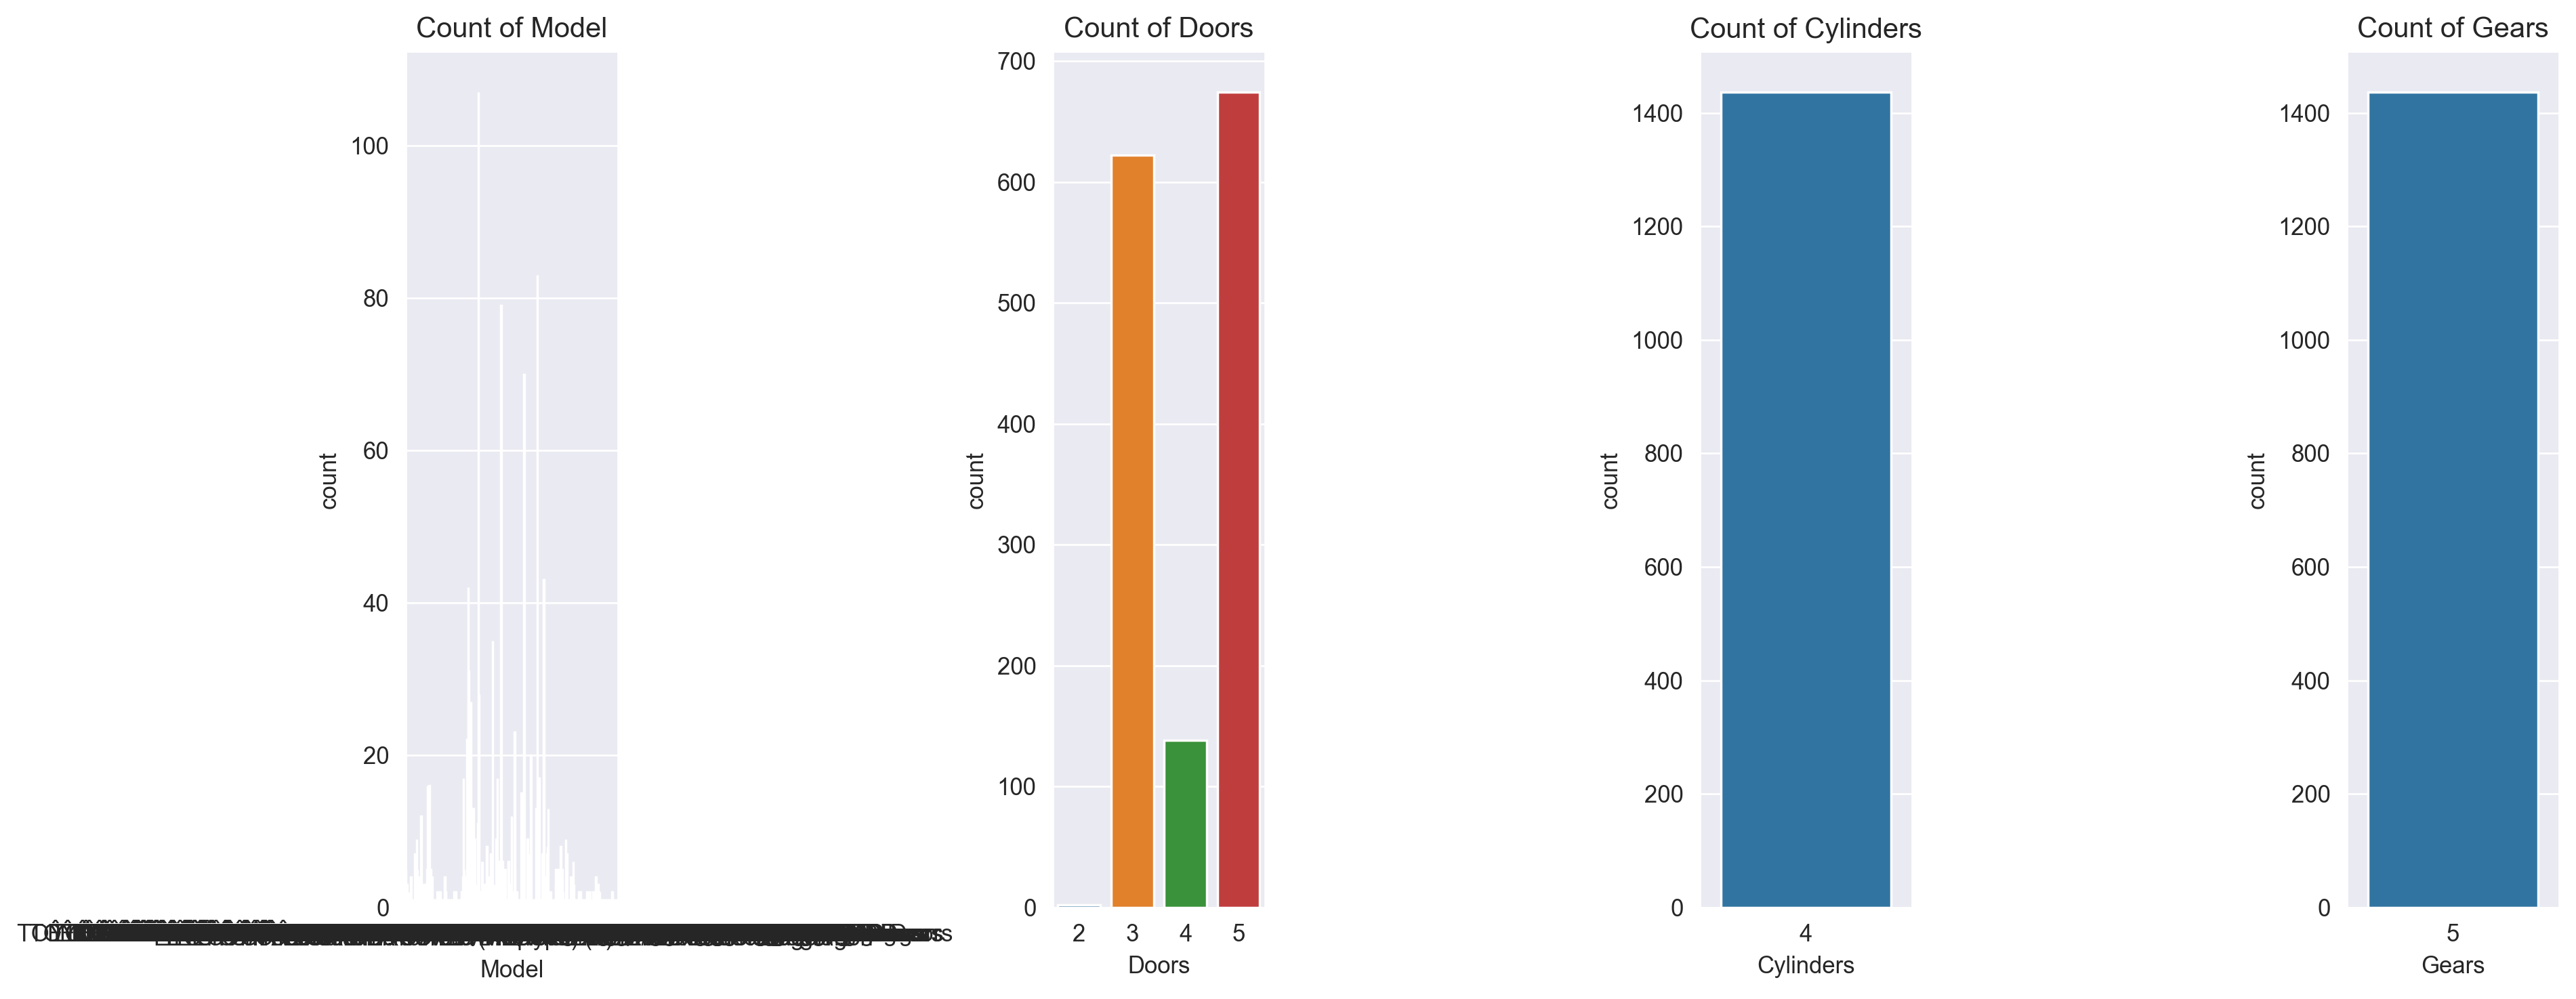

In [41]:
# Explore categorical variables
cat_features = ['Model', 'Doors', 'Cylinders', 'Gears']

plt.figure(figsize=(15, 6))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')

plt.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap')

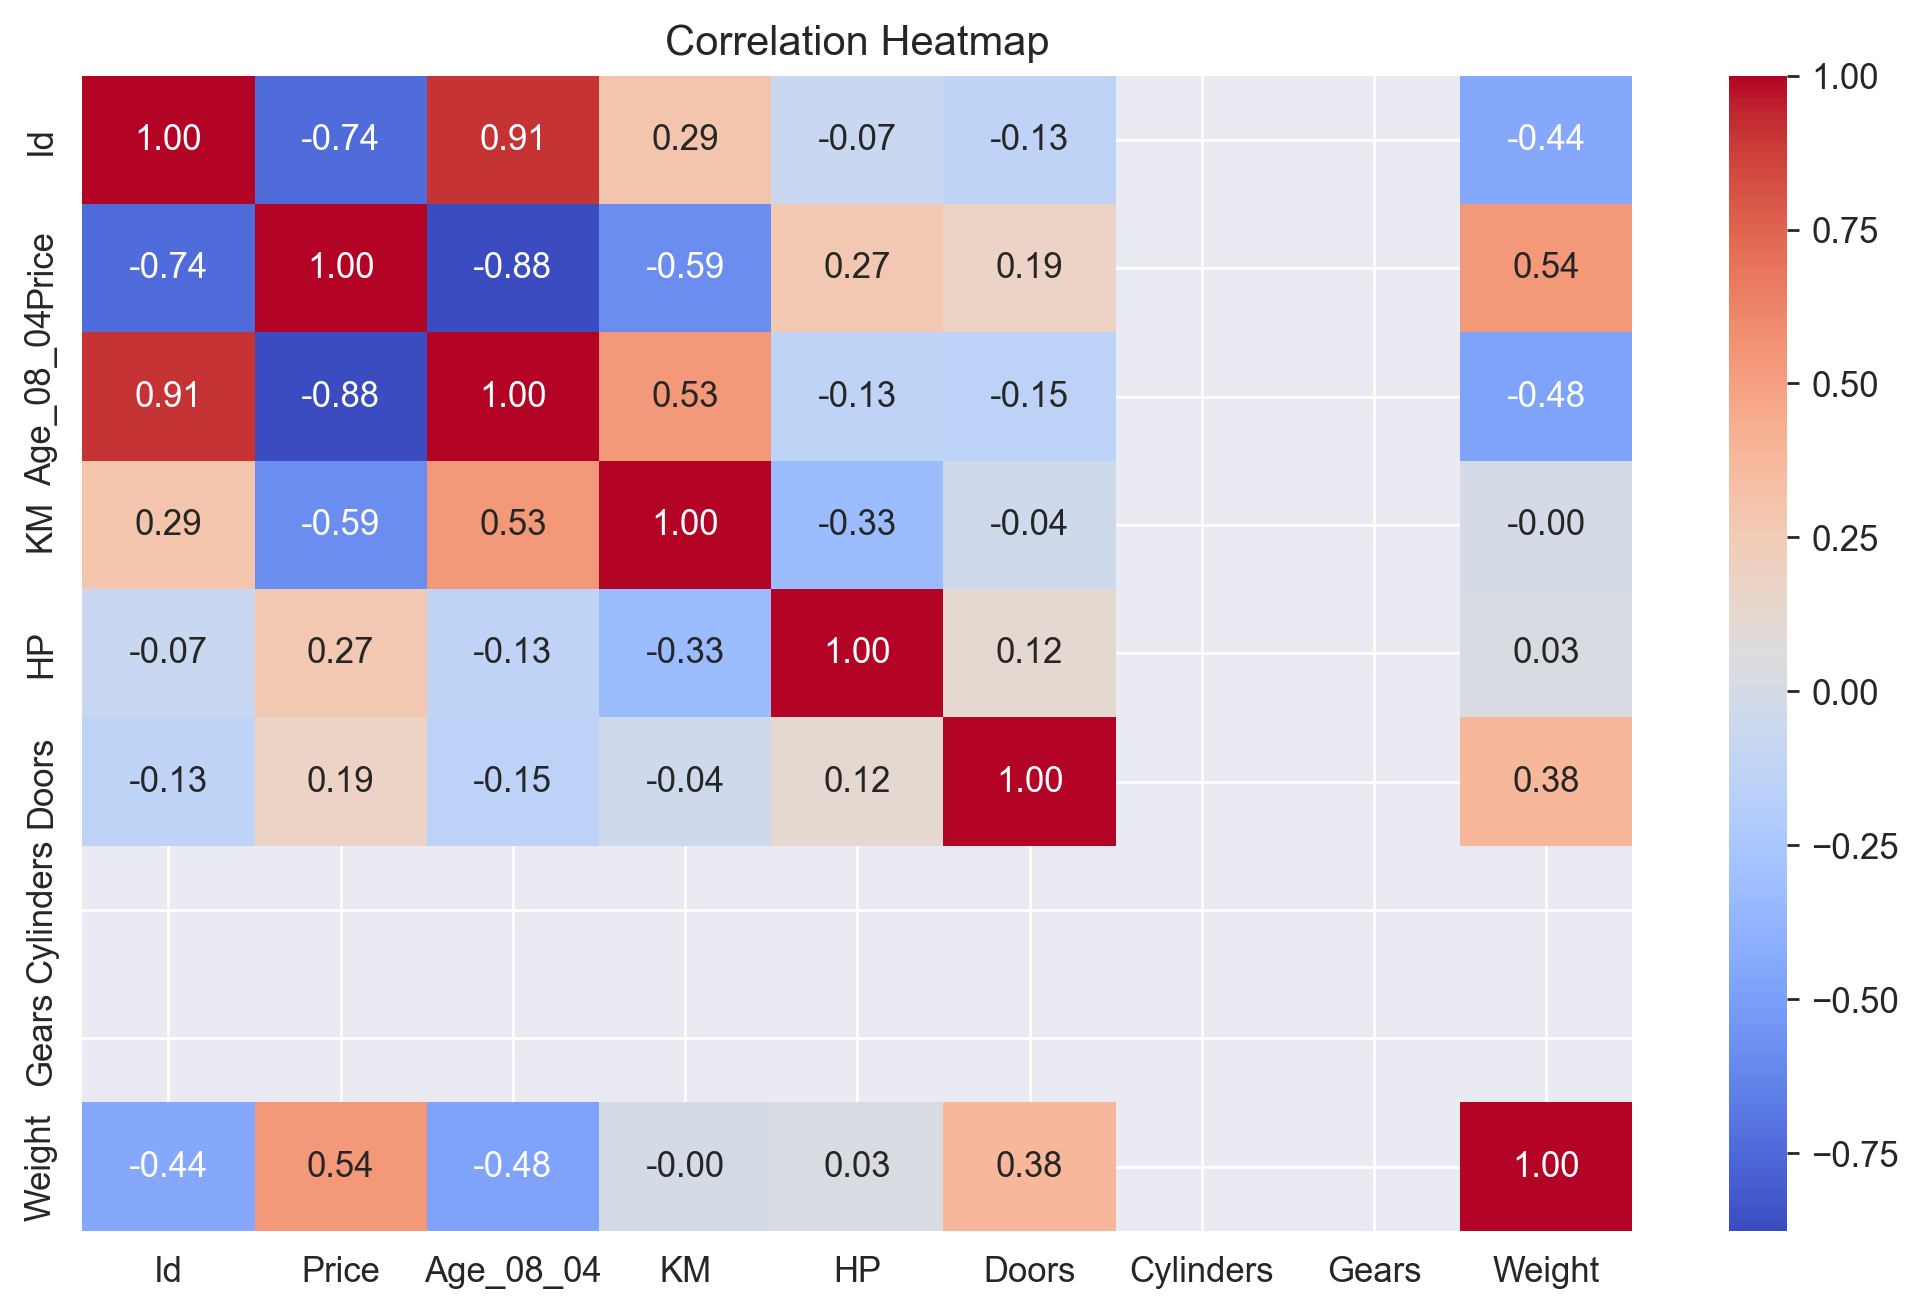

In [43]:
# Create a subset of only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Correlation matrix heatmap for numeric columns
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  # Add this import
import numpy as np

# Read the data from Excel into a pandas DataFrame
file_path = r"C:\Users\Pritee\OneDrive\Documents\aishwarya mam\machine learning\Toyoto_Corrola.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())

# Extracting features and target variable
X = df[['Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders', 'Gears', 'Weight']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = metrics.r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f'R-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adj_r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')


   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

      KM  HP  Doors  Cylinders  Gears  Weight  
0  46986  90      3          4      5    1165  
1  72937  90      3          4      5    1165  
2  41711  90      3          4      5    1165  
3  48000  90      3          4      5    1165  
4  38500  90      3          4      5    1170  
R-squared: 0.8519
Adjusted R-squared: 0.8482
Mean Absolute Error (MAE): 998.51
Root Mean Squared Error (RMSE): 1405.73
Mean Squared Error (MSE): 1976089.98


In [45]:
# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
result_df

,Actual,Predicted,Difference
594,10800,11440.537938,-640.537938
754,9950,8980.878928,969.121072
630,7500,9605.176495,-2105.176495
1259,9250,8919.363054,330.636946
903,9750,10152.822892,-402.822892
...,...,...,...
174,21950,19539.110078,2410.889922
1428,8450,8090.637870,359.362130
297,12850,13752.443167,-902.443167
1435,6950,10981.703928,-4031.703928


In [46]:
# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})

# Display the entire DataFrame
print(result_df)

      Actual     Predicted   Difference
594    10800  11440.537938  -640.537938
754     9950   8980.878928   969.121072
630     7500   9605.176495 -2105.176495
1259    9250   8919.363054   330.636946
903     9750  10152.822892  -402.822892
...      ...           ...          ...
174    21950  19539.110078  2410.889922
1428    8450   8090.637870   359.362130
297    12850  13752.443167  -902.443167
1435    6950  10981.703928 -4031.703928
1009    8900  10950.265493 -2050.265493

[288 rows x 3 columns]


Text(0, 0.5, 'Predicted Values')

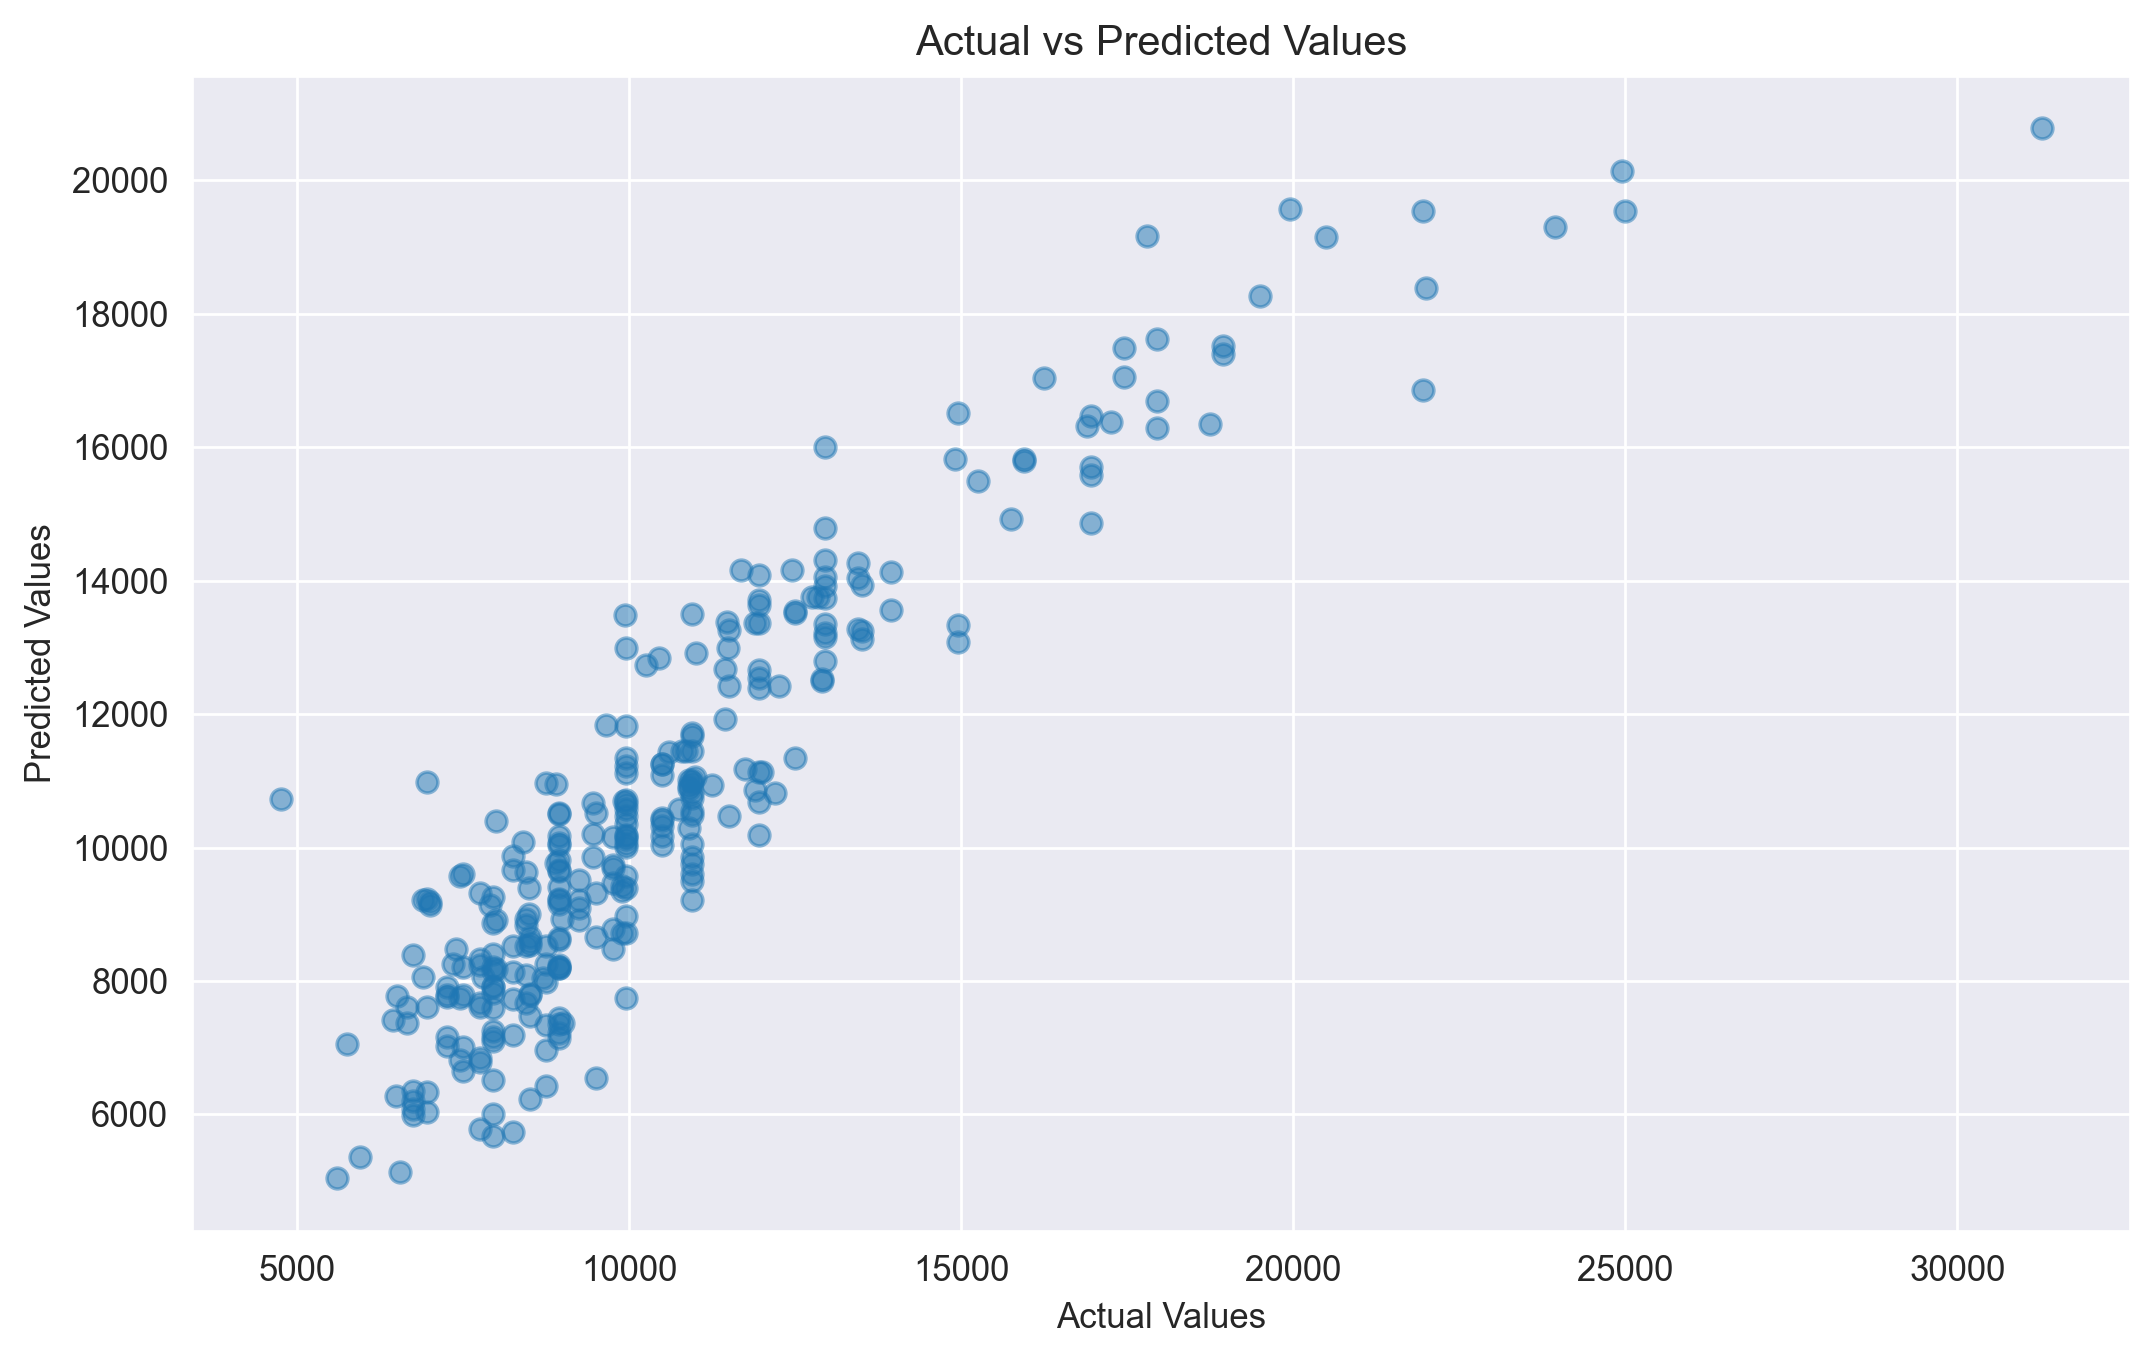

In [47]:
# Plot the difference between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(result_df['Actual'], result_df['Predicted'], alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0.5, 1.0, 'Q-Q Plot')

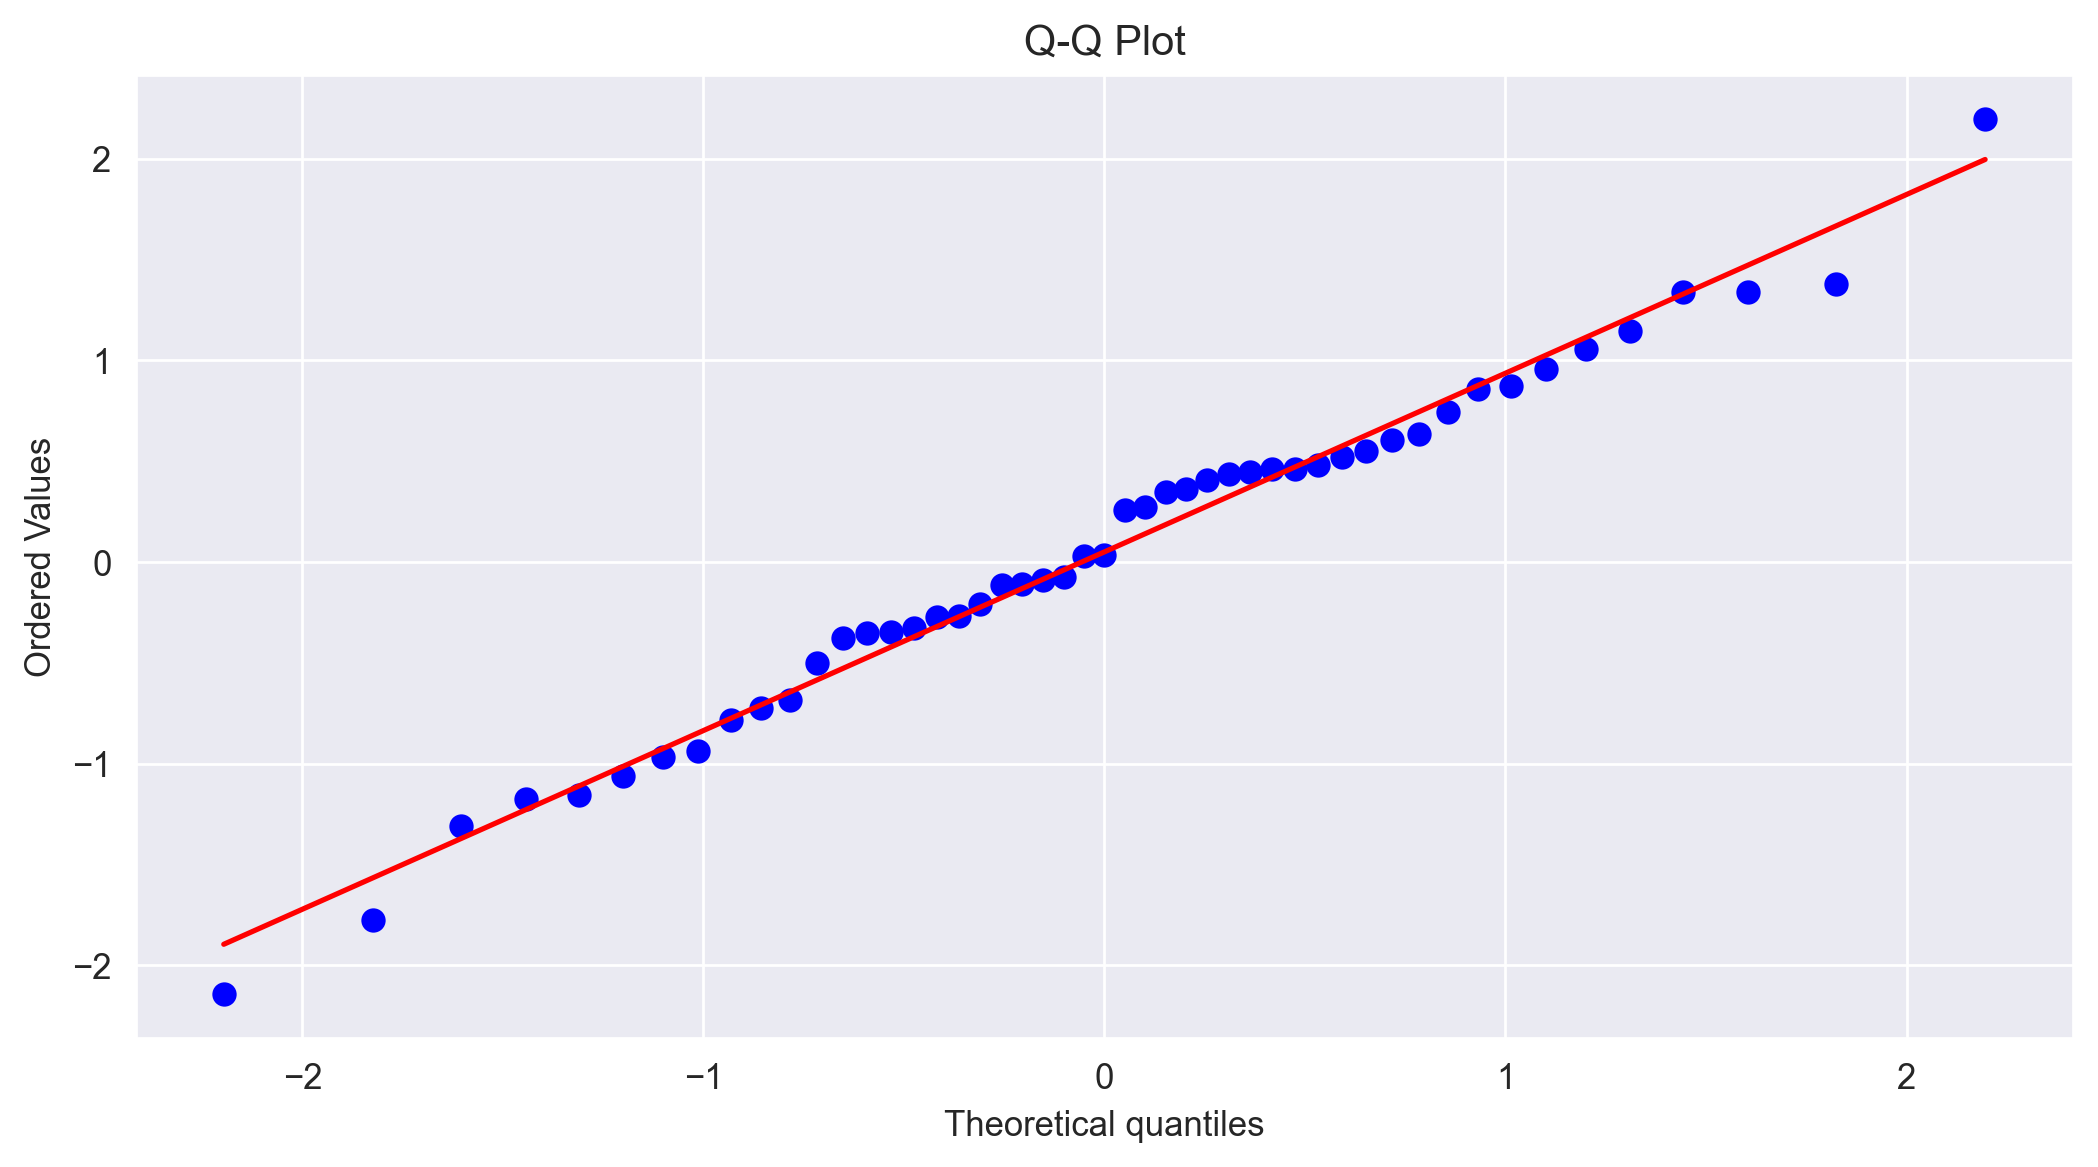

In [48]:
from scipy.stats import probplot

# Generate some random data
data = np.random.normal(size=49)

# Create a Q-Q plot
probplot(data, plot=plt)
plt.title('Q-Q Plot')